# Workshop 3: TEXT PROCESSING


In this workshop, you will use the tools demonstrated in 'TextProcessing-2020' (HLT 8) on examples of *real* texts. Firstly, in pairs within your group, go through Part 1 which looks at reading and determining the subject matter of an online news article. You may want to also try this out on news articles from today. Part 2 looks at reading raw text files and comparing lexical diversity of two famous novels. 

## Group Challenge

"Lyrics in modern popular music are simplistic and repetitive. Classic songs have so much more diversity." 

A prime example used to back up this statement is Ed Sheeran's 'Shape of You', which repeats "I'm in love with your body" over and over. The lexical diversity of this song is only 0.21. 

<b>Can you find 4 counterexamples which challenge this statement?</b> – 2 classic songs which have a lower lexical diversity, and 2 modern songs which have a high lexical diversity. You can use BeautifulSoup to scrape the lyrics from a website, or download a text file of the lyrics.

*One example to get you started: Rage Against the Machine’s most famous song - 'Killing in the Name' scores a lowly 0.076.

<b>Can you reliably detect the topic of the song from the 5 most common words? If not, what could be done to improve the performance?</b>

Note that Assignment 1 will delve deeper into this topic.

The outcome of the Group Challenge should be captured on the Discussion Sheet and uploaded to Brightspace by one member of the group.

## Part 1: Reading HTML from the web

**Goal: Understand the subject of an online news article through content words**

A huge amount of text is available online. While it is a fantastic resource for NLP research, the HTML used to structure most web pages means accessing the content of interest can be difficult; we often end up with more tags and links than the text of interest. We will use the Python packages 'requests' and 'BeautifulSoup' to first retrieve the data, then parse the HTML.

In [1]:
import nltk
from bs4 import BeautifulSoup
import requests

ModuleNotFoundError: No module named 'bs4'

If you get the error: **ModuleNotFoundError: No module named 'bs4'**, run the following command in a terminal window to install BeautifulSoup4: 

* pip install beautifulsoup4

The URL for this article is from the Florida school shooting last year.

In [10]:
url = 'https://www.irishtimes.com/news/world/us/florida-shooting-\
       teenager-charged-with-17-counts-of-murder-1.3393087'

page = requests.get(url)

BeautifulSoup creates an object with methods which can be used to easily display selected sections

In [12]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE doctype html>
<html class="no-js" lang="en" prefix="og:http://ogp.me/ns# fb:http://www.facebook.com/2008/fbml rNews:http://www.iptc.org/ns/1.0 irishtimes:http://www.irishtimes.com/" version="HTML+RDFa 1.1">
 <head>
  <script>
   dataLayer = [{
 'Page_Type': 'metered_article',
 'Topic': 'news,world,us,donald-trump,douglas-stoneman,nicolas-cruz,broward-county,coral-springs'
 }];
  </script>
  <script>
   (function (w, d, s, l, i) {
 w[l] = w[l] || [];
 w[l].push({'gtm.start': new Date().getTime(), event: 'gtm.js'});
 var f = d.getElementsByTagName(s)[0], j = d.createElement(s), dl = l != 'dataLayer' ? '&l=' + l : '';
 j.async = true;
 j.src = '//www.googletagmanager.com/gtm.js?id=' + i + dl;
 f.parentNode.insertBefore(j, f);
 })(window, document, 'script', 'dataLayer', 'GTM-M9Q373');
  </script>
  <style>
   .async-hide { opacity: 0 !important }
  </style>
  <script>
   (function(a,s,y,n,c,h,i,d,e){s.className+=' '+y;h.start=1*new Date;
 h.end=i=function(){s.className=s.classNa

That's a lot of markup and Javascript which is not relevant for us! To extract the story, we identify which tags it is contained within. In this case: 
* p class="no_name"

In [16]:
p_tags = soup.find_all('p', class_="no_name")

Check the first three p tags

In [17]:
p_tags[:3]

[<p class="no_name">US president <a class="search" href="/topics/topics-7.1213540?article=true&amp;tag_person=Donald+Trump">Donald Trump</a> has said Wednesday’s mass shooting turned a Florida school into a “scene of terrible violence, hatred and evil”.</p>,
 <p class="no_name">Mr Trump was speaking a day after the shooting that killed at least 17 people.</p>,
 <p class="no_name">Mr Trump said the entire nation “with one heavy heart” was praying for the victims and their families.</p>]

.get_text() removes all tags

In [21]:
sentences = [p.get_text() for p in p_tags]
sentences[:3]


['US president Donald Trump has said Wednesday’s mass shooting turned a Florida school into a “scene of terrible violence, hatred and evil”.',
 'Mr Trump was speaking a day after the shooting that killed at least 17 people.',
 'Mr Trump said the entire nation “with one heavy heart” was praying for the victims and their families.']

Now the sentences can be concatenated to a single string

In [22]:
mytext = ' '.join(sentences)
mytext

'US president Donald Trump has said Wednesday’s mass shooting turned a Florida school into a “scene of terrible violence, hatred and evil”. Mr Trump was speaking a day after the shooting that killed at least 17 people. Mr Trump said the entire nation “with one heavy heart” was praying for the victims and their families. He said no child should have to go to school fearing for their lives. Mr Trump said he would travel to Florida to meet with victims’ families, explore how to better secure schools and “tackle the difficult issue of mental health”. The president was silent on the issue of gun control. Suspect Nikolas Cruz is due to appear in court later on Thursday having been charged with 17 counts of premeditated murder. The incident happened at Marjory Stoneman Douglas High School in Parkland, a town about 50km north of Fort Lauderdale, shortly before 3pm as the school day was coming to a close. Among the victims of the attack are Aaron Feis an assistant football coach at the school. 

There's a few words at the end which are not part of the story: ' – Additional reporting: PA'. These can be manually removed by slicing to the first index of the unwanted words. Here the last 50 characters of the remaining text are displayed.

In [23]:
mytext = mytext[:mytext.index(' – Additional reporting: PA')]
mytext[-50:]

'ol shot 16 people, killing two other 15-year-olds.'

Tokenize the string into individual words and print the first 30

In [24]:
tokens = nltk.word_tokenize(mytext)
print(tokens[:30])

['US', 'president', 'Donald', 'Trump', 'has', 'said', 'Wednesday', '’', 's', 'mass', 'shooting', 'turned', 'a', 'Florida', 'school', 'into', 'a', '“', 'scene', 'of', 'terrible', 'violence', ',', 'hatred', 'and', 'evil', '”', '.', 'Mr', 'Trump']


In [28]:
len(tokens)

1026

We can remove punctuation and change all tokens to lowercase by using .lower() and .isalnum()

In [30]:
words_n_nums = [t.lower() for t in tokens if t.isalnum()]
print(words_n_nums[:30])

['us', 'president', 'donald', 'trump', 'has', 'said', 'wednesday', 's', 'mass', 'shooting', 'turned', 'a', 'florida', 'school', 'into', 'a', 'scene', 'of', 'terrible', 'violence', 'hatred', 'and', 'evil', 'mr', 'trump', 'was', 'speaking', 'a', 'day', 'after']


Sorting the tokens can be useful for inspection (e.g. here showing first 20 and last 20)

In [12]:
sorted_words_n_nums = sorted(words_n_nums)
print(sorted_words_n_nums[:20])

['12', '15', '16', '16', '17', '17', '17', '2018', '3pm', '50km', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']


In [13]:
print(sorted_words_n_nums[-20:])

['who', 'who', 'who', 'whose', 'will', 'will', 'with', 'with', 'with', 'with', 'with', 'with', 'with', 'work', 'workers', 'would', 'wounded', 'years', 'you', 'you']


Frequency distribution provides ordered counts of tokens

In [14]:
fd = nltk.FreqDist(words_n_nums)
print(fd.most_common(10))

[('the', 54), ('to', 28), ('of', 21), ('and', 21), ('a', 19), ('in', 18), ('said', 16), ('school', 16), ('was', 10), ('he', 10)]


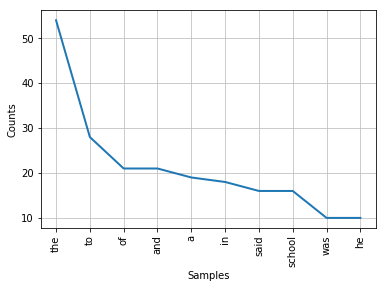

In [16]:
fd.plot(10)

From these 10 most common words, would you be able to guess the content of this article? Probably not. The only word which gives us any useful information is *'school'*.

There are a lot of stopwords (e.g. 'the, 'a', 'of') which don't provide much information on the content of the article. In addition, 'shoot', 'shot', 'shooting', 'shoots', 'shooter' will all have separate counts when it would be more appropriate to combine them into a single token.

To remove stopwords, nltk provides an in-built list. 

In [32]:
from nltk.corpus import stopwords
filtered_words = [w.lower() for w in words_n_nums if w.lower() not in stopwords.words('english')]

To combine counts for words with the same stem, we can use nltk's Porter stemmer

In [33]:
porter = nltk.PorterStemmer()

In [35]:
stemmed_words = [porter.stem(w) for w in filtered_words]

In [36]:
print(stemmed_words[:10])

['us', 'presid', 'donald', 'trump', 'said', 'wednesday', 'mass', 'shoot', 'turn', 'florida']


In [39]:
fd = nltk.FreqDist(stemmed_words)
print(fd.most_common(10))

[('school', 20), ('said', 16), ('victim', 8), ('student', 8), ('mr', 7), ('day', 7), ('attack', 7), ('famili', 6), ('trump', 5), ('shoot', 5)]


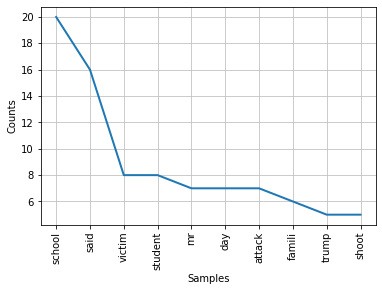

In [40]:
fd.plot(10)

Now it is possible to quickly grasp the subject matter of the article - a serious school shooting.

## Part 2: Reading text files

**Goal: Compare the lexical diversity of two of Ireland's most famous novels, Ulysses and Dracula.**

Download the Ulysses and Dracula text files from Brightspace making sure they are placed in the same folder as this notebook.

Load the text files using the following code:

In [23]:
def load_txt(file):
    with open(file, encoding='utf8') as f:
        return ' '.join(line.strip() for line in f.readlines())

In [24]:
ulysses_txt = load_txt('ulysses.txt')
dracula_txt = load_txt('dracula.txt')

The introductions and ends include text we don't need. You can check the first N characters by slicing the string just like a list, e.g. list_name[:N]

In [25]:
ulysses_txt[:1000]

'   The Project Gutenberg EBook of Ulysses, by James Joyce  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org   Title: Ulysses  Author: James Joyce  Release Date: August 1, 2008 [EBook #4300] Last Updated: May 16, 2016  Language: English  Character set encoding: UTF-8  *** START OF THIS PROJECT GUTENBERG EBOOK ULYSSES ***     Produced by Col Choat, and David Widger        ULYSSES   by James Joyce      Contents — I —  [ 1 ] [ 2 ] [ 3 ] — II —  [ 4 ] [ 5 ] [ 6 ] [ 7 ] [ 8 ] [ 9 ] [ 10 ] [ 11 ] [ 12 ] [ 13 ] [ 14 ] [ 15 ] — III —  [ 16 ] [ 17 ] [ 18 ]          — I —      [ 1 ]  Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. A yellow dressinggown, ungirdled, was sustained gently behind him on the mild morning air. He hel

Find the location of the first word of interest - 'Stately'

In [26]:
ulysses_txt.find('Stately')

780

Find the location of the end - easily found by the string 'End of the Project Gutenberg'

In [27]:
ulysses_txt.find('End of the Project Gutenberg')

1511871

Splice the text to get that raw content we are interested in. You can splice between two numbers (N,M) by using list_name[N:M]

In [28]:
ulysses_raw = ulysses_txt[780:1511871]

Check the beginning and end

In [29]:
ulysses_raw[:200]

'Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. A yellow dressinggown, ungirdled, was sustained gently behind him on the mild '

In [30]:
ulysses_raw[-200:]

'put my arms around him yes and drew him down to me so he could feel my breasts all perfume yes and his heart was going like mad and yes I said yes I will Yes.  Trieste-Zurich-Paris  1914-1921         '

Repeat for Dracula

In [31]:
dracula_txt.find('3 May')

1400

In [32]:
dracula_txt.find('End of the Project Gutenberg')

838863

In [33]:
dracula_raw = dracula_txt[1400:838863]

Tokenize the raw content

In [34]:
ulysses_tokens = nltk.word_tokenize(ulysses_raw)
dracula_tokens = nltk.word_tokenize(dracula_raw)

Check the output is a list of words

In [35]:
print(ulysses_tokens[:10])

['Stately', ',', 'plump', 'Buck', 'Mulligan', 'came', 'from', 'the', 'stairhead', ',']


**Lexical Diversity Calculation**

Recall that lexical diversity is calculated by dividing the number of unique words  by the total number of words. For example:

"yes no yes no yes no yes no yes no" = 2/10 -> 0.2

"I went to the cinema and watched a great film" = 10/10 -> 1.0

In [36]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [37]:
lexical_diversity(ulysses_tokens)

0.1092620219012855

In [38]:
lexical_diversity(dracula_tokens)

0.055123099203475745

It appears that Ulysses has nearly twice the lexical diversity of Dracula. Why do you think this is? 

How would this change if you carried out the preprocessing steps used in Part 1 (removal of punctuation and stopwords and using a stemmer)?